<a href="https://colab.research.google.com/github/abdulrazique23/Regulatory-Affairs-of-Road-Accident-Data-2020-India-_-ML/blob/main/project1_ipynb(_Regulatory_Affairs_of_Road_Accident).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Regulatory Affairs of Road Accident Data 2020 India (1).csv")
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check unique values
print(df['Cause category'].unique())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64
['Traffic Control' 'Junction' 'Traffic Violation' 'Road Features'
 'Impacting Vehicle/Object' 'Weather']


['Greviously Injured' 'Minor Injury' 'Persons Killed' 'Total Injured'
 'Total number of Accidents']


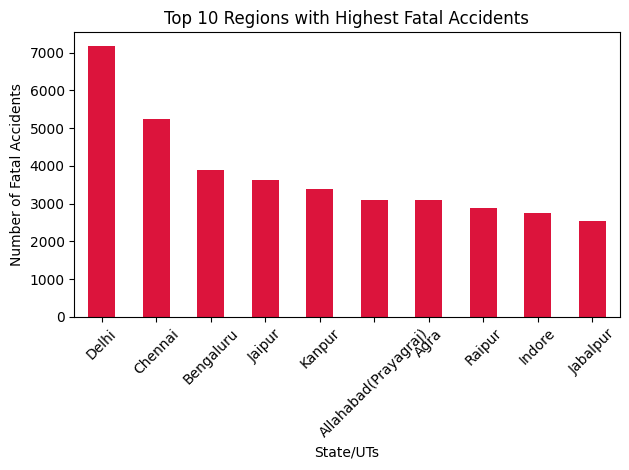

Million Plus Cities
Delhi                   7176.0
Chennai                 5232.0
Bengaluru               3876.0
Jaipur                  3636.0
Kanpur                  3378.0
Allahabad(Prayagraj)    3102.0
Agra                    3084.0
Raipur                  2892.0
Indore                  2754.0
Jabalpur                2532.0
Name: Count, dtype: float64


In [9]:
# Check available values
print(df['Outcome of Incident'].unique())

# Filter only fatal outcomes
fatal_by_city = df[df['Outcome of Incident'] == 'Persons Killed']

# Group by the correct column (e.g., State/UTs), sum the counts, and get top 10
top_cities = fatal_by_city.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False).head(10)

# Plot
top_cities.plot(kind='bar', color='crimson')
plt.title('Top 10 Regions with Highest Fatal Accidents')
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('State/UTs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_cities)

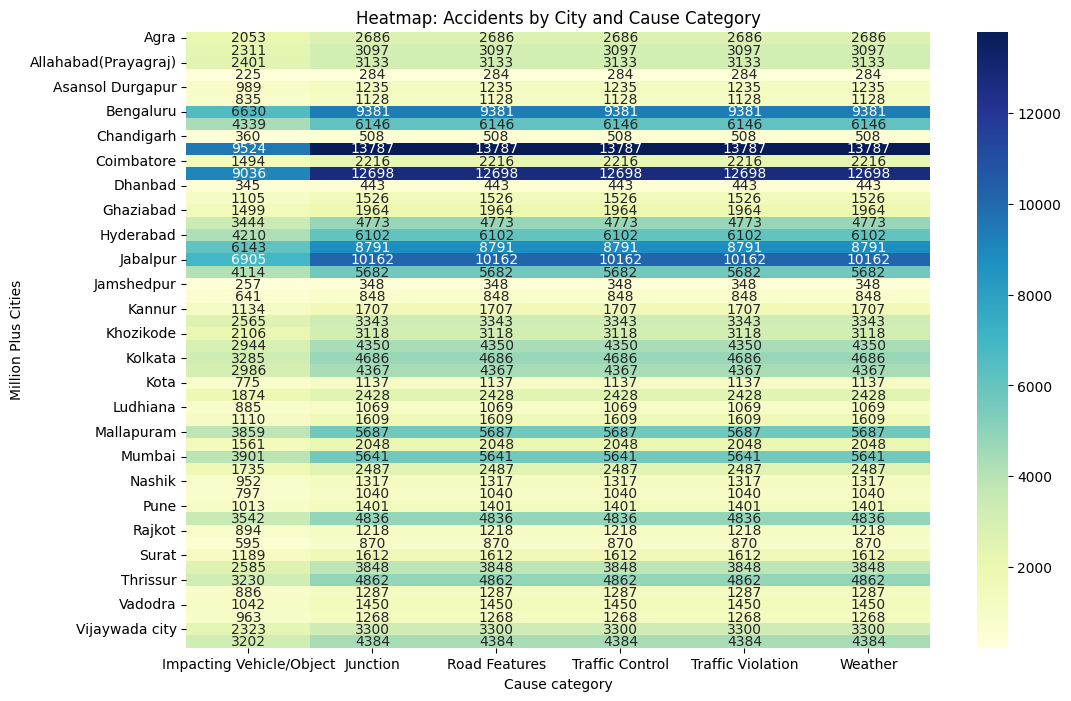

In [10]:
pivot_table = df.pivot_table(values='Count', index='Million Plus Cities', columns='Cause category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Heatmap: Accidents by City and Cause Category')
plt.show()

In [11]:
data = {
    'Cause category': ['Speeding', 'Speeding', 'Alcohol', 'Alcohol', 'Distraction', 'Distraction'],
    'Outcome of Incident': ['Fatal', 'Non-Fatal', 'Fatal', 'Non-Fatal', 'Fatal', 'Non-Fatal'],
    'Count': [120, 300, 80, 220, 60, 150]
}

In [12]:
df = pd.DataFrame(data)

In [13]:
outcome_vs_cause = df.pivot_table(
    values='Count',
    index='Cause category',
    columns='Outcome of Incident',
    aggfunc='sum',
    fill_value=0
)

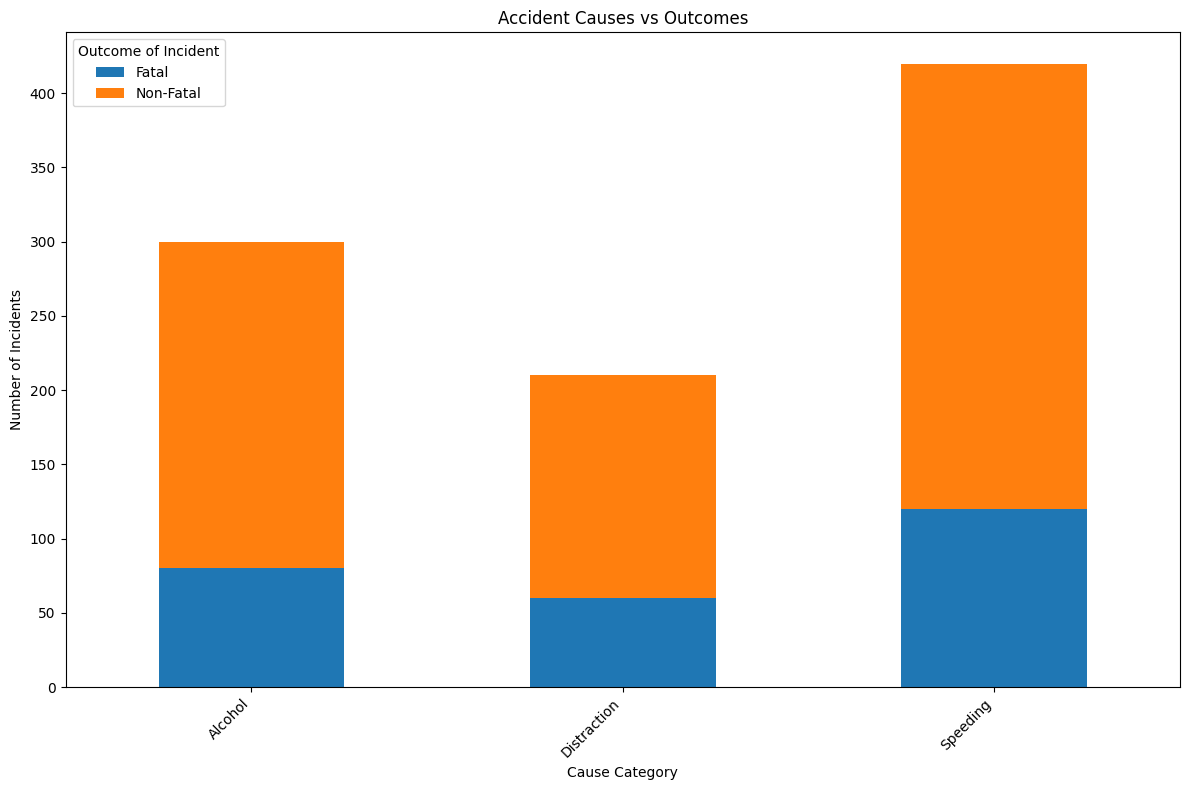

In [14]:
outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Accident Causes vs Outcomes')
plt.xlabel('Cause Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
print(df.columns)

Index(['Cause category', 'Outcome of Incident', 'Count'], dtype='object')


In [16]:
# Cities with the Highest Number of Accidents
top_cities = pivot_table.sum(axis=1).sort_values(ascending=False).head(10)
print(top_cities)

Million Plus Cities
Chennai       78459.0
Delhi         72526.0
Jabalpur      57715.0
Bengaluru     53535.0
Indore        50098.0
Bhopal        35069.0
Hyderabad     34720.0
Jaipur        32524.0
Mallapuram    32294.0
Mumbai        32106.0
dtype: float64
